# Amazon.com and the Rise of Useless Reviews
### How book reviews on Amazon have become less helpful

(Note: This project makes use of a random sample from a database of 8.9 million Amazon book reviews available at: http://jmcauley.ucsd.edu/data/amazon/)

Over the past decade, Amazon has come to dominate the online marketplace. In fact, in 2016 Amazon accounted for 43% of online purchases in 2016, and that percentage is only expected to increase over time (according to [BusinessInsider.com](http://www.businessinsider.com/amazon-accounts-for-43-of-us-online-retail-sales-2017-2) and [Statista.com](https://www.statista.com/statistics/788109/amazon-retail-market-share-usa/). In 2017, 64% of U.S. households had an Amazon Prime membership ([Forbes.com](https://www.forbes.com/sites/shephyken/2017/06/17/sixty-four-percent-of-u-s-households-have-amazon-prime/). As anyone who has shopped online has experienced, product reviews are a major benefit of online shopping, empowering consumers to leverage unprecedented amounts of information to make purchasing decisions. And as Amazon has grown, so has the number of product reviews it has available.

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import string

from ipywidgets import FloatProgress
from IPython.display import display

In [2]:
# Load review data into csv
filename = './data/reviews_w_length.csv'
reviews_df = pd.read_csv(filename, index_col=0)

In [4]:
# Reformat data to datetime from unix format.
reviews_df['reviewTime'] = pd.to_datetime(reviews_df['unixReviewTime'], unit='s')

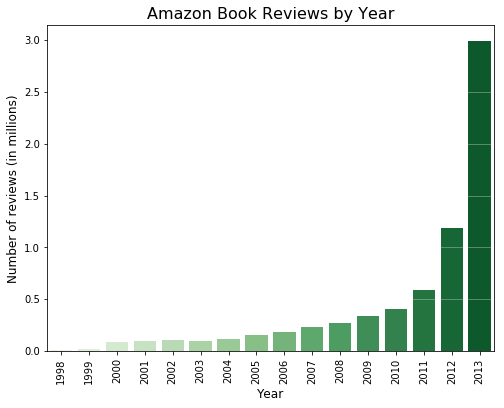

In [330]:
# Count reviews by year
reviews_by_year = reviews_df['reviewTime'].dt.year.value_counts()
# Adjust figure size of plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Use seaborn library to create a bar plot of review count by year.
sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, palette='Greens')
# Set grid lines
plt.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Rotate xtick labels for visibility
plt.xticks(rotation=90)
# Set x limits to cut off earliest years and 2014, which only has data through July
plt.xlim((0.5,16.5))
# Adjust yticks to account for 2% sample of data.
yticks = [((label/0.02)/10**6)for label in plt.yticks[0]]
ax.set_yticklabels(yticks)
# Add plot title and axis labels, show plot
plt.title('Amazon Book Reviews by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of reviews (in millions)', fontsize=12)
plt.show()

(Note: 2014 is omitted in the plot above because the dataset only includes ratings and reviews through July of 2014.)

Drawing from a database of 8.9 million book reviews on Amazon, it is evident that there has been a dramatic increase in product reviews for books alone. At first glance, this would seem to be a very positive trend for consumers who read reviews before making online purchases - never before has so much information been available on which to base a purchase. However, closer scrutiny reveals that this is not such a straightforward conclusion.  

Each review on Amazon has "helpful" and "not helpful" buttons underneath it. These provide feedback to Amazon, the reviewer, and other Amazon customers that is valuable when choosing which reviews, and is really the only means of guidance in choosing reviews out of hundreds, or sometimes even thousands, to consider trustworthy.

A quick look at the average "helpful" rating of a reviews on Amazon over time reveals a problem.

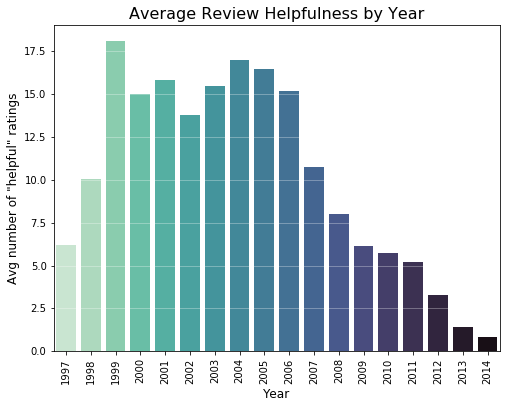

In [329]:
# Aggregate reviews by year and take the mean helpfulness of reviews in each year.
helpfulness_by_year = reviews_df['helpful'].groupby(reviews_df['reviewTime'].dt.year).mean()
#A djust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a barplot of average helpfulness by year.
sns.barplot(x=helpfulness_by_year.index, y=helpfulness_by_year.values, palette='mako_r')
# Set grid lines
plt.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Rotate xtick labels for visibility
plt.xticks(rotation=90)
# Add plot title and axis labels, show plot
plt.title('Average Review Helpfulness by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg number of "helpful" ratings', fontsize=12)
plt.show()

As can be seen in the plot above, the average "helpful" rating of reviews declined dramatically from 2006 to 2007 and has continued to decline ever since. It is apparent that, while the number of book reviews on Amazon has grown very rapidly, a much lower percentage of people consider them helpful.

To look at this a slightly different way, the chart below shows the percentage of reviews that at least one person has rated helpful for each year from 1997 to 2014.

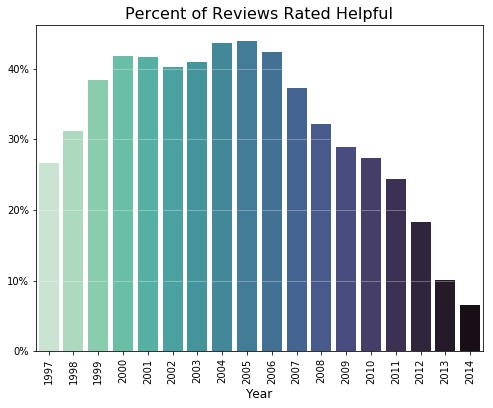

In [326]:
# Aggregate reviews by year and take the mean helpfulness of reviews in each year.
helpful_reviews_by_year = reviews_df[reviews_df['helpful'] > 1]['reviewTime'].dt.year.value_counts()/reviews_by_year
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a barplot of average helpfulness by year.
sns.barplot(x=helpful_reviews_by_year.index, y=helpful_reviews_by_year.values, palette='mako_r')
# Set grid lines
plt.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Format ytick labels
yticks = [('%0.0f' % (label/1000) +'%') for label in plt.yticks[0]]
ax.set_yticklabels(yticks)
# Rotate xtick labels for visibility
plt.xticks(rotation=90)
# Add plot title and axis labels, show plot
plt.title('Percent of Reviews Rated Helpful', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.show()

It is clear from each of these plots above that, as the number of book reviews on Amazon has increased dramatically, the number that are rated helpful has not increased proportionately. Compared to the years 2000 to 2008, the years 2011 to 2014 have a much smaller percentage of reviews that have been rated helpful by even one person - even though far more reviewers are active.

There are a number of possible causes for this, one of which is simply that people are not putting as much effort into writing reviews. One way to measure this is the look at the average length of reviews over time as can be seen in the chart below.

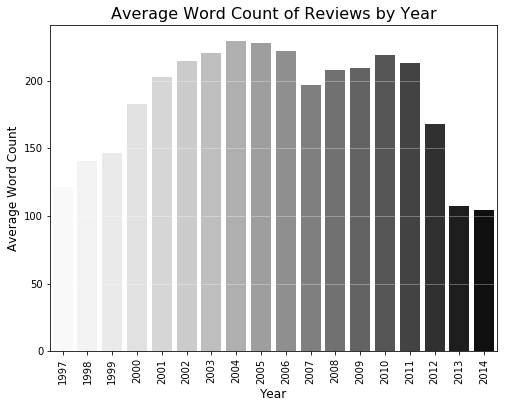

In [328]:
# Aggregate reviews by year take the mean length of reviews in each year.
review_length_by_year = reviews_df['reviewLength'].groupby(reviews_df['reviewTime'].dt.year).mean()
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a barplot of the average review length each year.
sns.barplot(x=review_length_by_year.index, y=review_length_by_year.values, palette='Greys')
# Set grid lines
plt.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Rotate xtick labels for visibility
plt.xticks(rotation=90)
# xc, show plot
plt.title('Average Word Count of Reviews by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)
plt.show()

There was a very large drop-off in length for the average Amazon review, which started in 2012 and continued in 2013 and 2014. This correlates with the steepest drop-offs in the helpfulness of the average review, as well as the sharpest increases in number of book reviews on Amazon. 

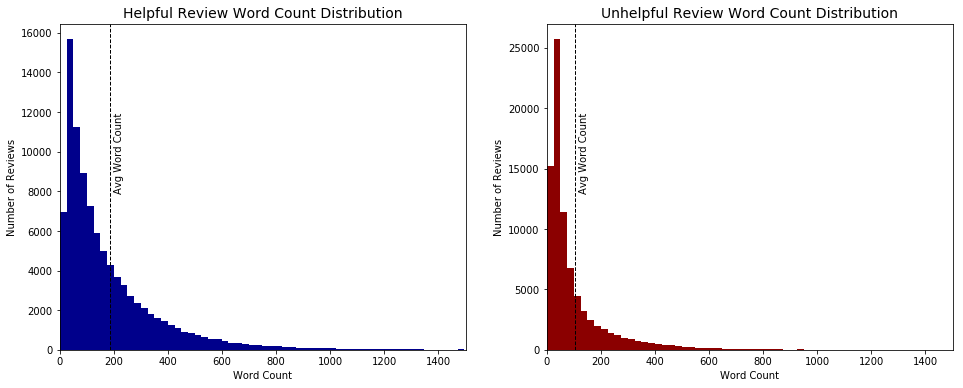

Average word count of reviews with at least 1 "helpful" rating = 185
Average word count of reviews with zero "helpful" ratings = 104


In [200]:
# Create dataframe of reviews rated helpful by at least one person.
helpful_review_length = reviews_df[reviews_df['helpful'] >= 1.0]['reviewLength']
# Create dataframe of reviews that that were not rated helpful.
unhelpful_review_length = reviews_df[reviews_df['helpful'] == 0]['reviewLength']
# Setup subplots, figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Configure first plot from helpful reviews dataframe 
ax1.hist(helpful_review_length, bins=200, color='darkblue')
# Cut off outliers by setting limit on x axis
ax1.set_xlim(xmin=0, xmax = 1500)
# Set vertical line at mean
ax1.axvline(helpful_review_length.mean(), color='k', linestyle='dashed', linewidth=1)
# Label vertical line
ax1.text(200,11600,'Avg Word Count',rotation=90)
# Add plot title and axis labels
ax1.set_title('Helpful Review Word Count Distribution', fontsize=14)
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Number of Reviews')

# Configure second plot from unhelpful reviews dataframe
ax2.hist(unhelpful_review_length, bins=200, color='darkred')
# Cut off outliers by setting limit on x axis
ax2.set_xlim(xmin=0, xmax = 1500)
# Set vertical line at mean
ax2.axvline(unhelpful_review_length.mean(), color='k', linestyle='dashed', linewidth=1)
# Label vertical line
ax2.text(120,19000,'Avg Word Count',rotation=90)
# Add plot title and axis labels, show plot
ax2.set_title('Unhelpful Review Word Count Distribution', fontsize=14)
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Number of Reviews')
plt.show()

# Print average word counts per plot below them.
print('Average word count of reviews with at least 1 "helpful" rating = %0.0f' % helpful_review_length.mean())
print('Average word count of reviews with zero "helpful" ratings = %0.0f' % unhelpful_review_length.mean())

As the charts above show, longer reviews do tend to be rated as "helpful" more often. The plot on the left shows the  distribution of word counts for reviews that have at least one helpful rating, with the average word count for these being 185. This word count is 80% higher than that of reviews that received no helpful ratings at all. The distribution of word counts for reviews with no helpful ratings can be seen in the plot on the right, which shows an average word count much lower than reviews that have been rated helpful.

Looking into this further, a sharp decline in number of reviews consisting of more than 185 words is apparent, as is a drastic increase in reviews consisting of 40 words or less. 

In 2011, more than 40% of book reviews on Amazon consisted of more than 185 words, and 11% of reviews consisted of fewer than 40 words. Within the span of 2 years, this comparison was turned on its head. In 2013, over 40% of reviews consisted of fewer than 40 words. Only 15% of reviews consisted of more than 185 words.

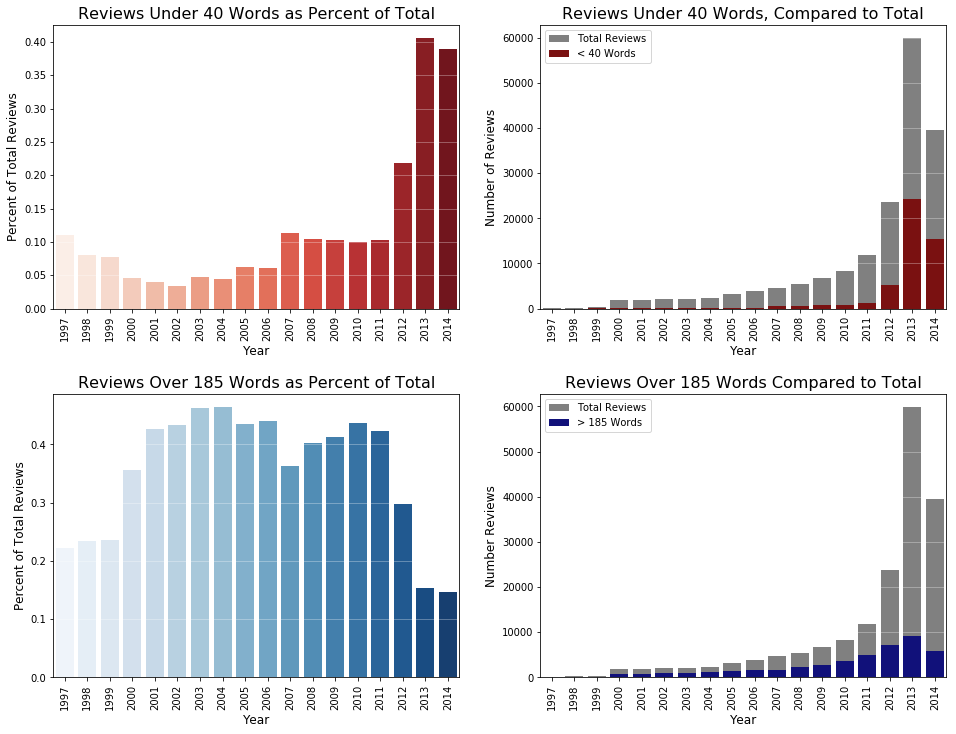

In [335]:
# Setup data to plot short review comparison, as percentage and by count comparison
short_reviews_by_year = reviews_df[reviews_df['reviewLength'] < 40]\
                    .groupby(reviews_df['reviewTime'].dt.year).size()/reviews_by_year
short_reviews_comp = reviews_df[reviews_df['reviewLength'] < 40]\
                    .groupby(reviews_df['reviewTime'].dt.year).size()

# Setup data to plot long review comparison, as percentage and by count comparison
long_reviews_by_year = reviews_df[reviews_df['reviewLength'] > 185]\
                .groupby(reviews_df['reviewTime'].dt.year).size()/reviews_by_year
long_reviews_comp = reviews_df[reviews_df['reviewLength'] > 185]\
                    .groupby(reviews_df['reviewTime'].dt.year).size()    

# Configure subplot layout and size
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(16, 12))
# Adjust spacing between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)

# Configure first subplot (top-left)
sns.barplot(x=short_reviews_by_year.index, y=short_reviews_by_year.values, ax=ax1, palette='Reds')
# Set grid lines
ax1.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
ax1.yaxis.grid(True)
ax1.xaxis.grid(False)
# Add plot title and axis labels
ax1.set_title('Reviews Under 40 Words as Percent of Total', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Percent of Total Reviews', fontsize=12)

# Configure second subplot (top-right)
sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, ax=ax2, color='grey', label='Total Reviews')
sns.barplot(x=short_reviews_comp.index, y=short_reviews_comp.values, ax=ax2, color='darkred', label='< 40 Words')
# Set grid lines
ax2.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
ax2.yaxis.grid(True)
ax2.xaxis.grid(False)
# Add plot title and axis labels, legend
ax2.set_title('Reviews Under 40 Words, Compared to Total', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Reviews', fontsize=12)
ax2.legend()

# Configure third subplot (bottom-left)
sns.barplot(x=long_reviews_by_year.index, y=long_reviews_by_year.values, ax=ax3, palette='Blues')
# Set grid lines
ax3.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
ax3.yaxis.grid(True)
ax3.xaxis.grid(False)
# Add plot title and axis labels
ax3.set_title('Reviews Over 185 Words as Percent of Total', fontsize=16)
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Percent of Total Reviews', fontsize=12)

# Configure fourth subplot (bottom-right)
sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, ax=ax4, color='grey', label='Total Reviews')
sns.barplot(x=long_reviews_comp.index, y=long_reviews_comp.values, ax=ax4, color='darkblue', label='> 185 Words')
# Set grid lines
ax4.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
ax4.yaxis.grid(True)
ax4.xaxis.grid(False)
# Add plot title and axis labels, legend
ax4.set_title('Reviews Over 185 Words Compared to Total', fontsize=16)
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Number Reviews', fontsize=12)
ax4.legend()

# Rotate all axes by 90 degrees
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
# Show plots
plt.show()


From all of the plots above, it seems evident that while Amazon reviews have become more numerous, they've also become much shorter, and are generally considered less helpful. 2012 seems to be a very pivotal year in this trend, and a little bit of research yields a potential reason.

In 2012 Amazon began removing reviews that did not meet certain criteria, and it removed them in large numbers. [A New York Times article](http://blog.karenwoodward.org/2012/11/amazon-reviews-are-disappearing.html) described Amazon's policy as:
Giving raves to family members is no longer acceptable. Neither is writers’ reviewing other writers. But showering five stars on a book you admittedly have not read is fine.

The blogosphere also lit up with commentary and investigation. Some reviewers who complained about their reviews received a form letter from Amazon stating: 
>I'm sorry for any previous concerns regarding your reviews on our site. We do not allow reviews on behalf of a person or company with a financial interest in the product or a directly competing product. This includes authors, artists, publishers, manufacturers, or third-party merchants selling the product.   
<br>We have removed your reviews as they are in violation of our guidelines.  We will not be able to go into further detail about our research.  
<br>I understand that you are upset, and I regret that we have not been able to address your concerns to your satisfaction. However, we will not be able to offer any additional insight or action on this matter.  


<br>
Many authors posted complaints on their blogs that their book reviews were disappearing. One such author, [Joe Konrath](http://jakonrath.blogspot.com/2012/11/amazon-removes-reviews.html), complained to Amazon, stating:
>My reviews followed all of Amazon's guidelines, and had received hundreds of helpful votes. They informed customers, and they helped sell books. They represented a significant time investment on my part, and they were honest and accurate and fully disclosed my relationships with the author I reviewed if I happened to know them. And these reviews were deleted without warning or explanation.

<br>
An [article at Forbes.com](https://www.forbes.com/sites/suwcharmananderson/2012/11/07/amazon-tackles-review-problem-deletes-wrong-reviews/#53f12ee87f2a) chronicled many more complaints by authors and other reviewers.  

Amazon began implementing this policy in September of 2012. Looking again at the decline in average review length, viewing it by quarter instead of by year, shows that this policy affected average review length immediately and drastically.

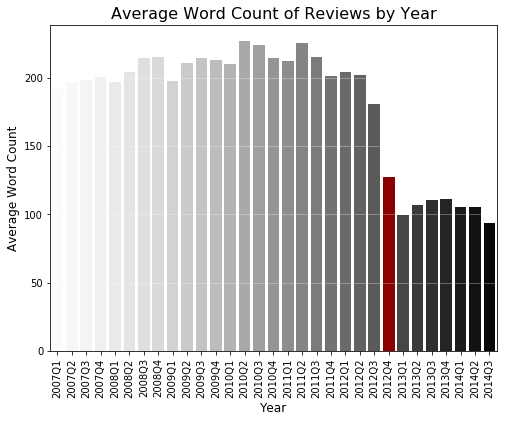

In [350]:
# Aggregate reviews by year take the mean length of reviews in each year.
review_length_by_year = reviews_df['reviewLength'].groupby(reviews_df['reviewTime'].dt.to_period('Q')).mean()
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a barplot of the average review length each year.
sns.barplot(x=review_length_by_year.index[39:], y=review_length_by_year.values[39:], palette='Greys')
# Set grid lines
plt.grid(color='white', linewidth=1, fillstyle='full', alpha=0.3)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
ax.patches[23].set_color('darkred')
# Rotate xtick labels for visibility
plt.xticks(rotation=90)
# xc, show plot
plt.title('Average Word Count of Reviews by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)
plt.show()

In [204]:
# Aggregate reviews dataframe by reviewerID, summing helpful ratings per reviewerID
reviewer_by_helpfulness = reviews_df['helpful'].groupby(reviews_df['reviewerID']).sum()

In [205]:
# Aggregate reviews dataframe by reviewerID, averaging word count per reviewerID
reviewer_by_avg_wordcount = reviews_df['reviewLength'].groupby(reviews_df['reviewerID']).mean()
# Convert series to dataframe
reviewer_by_avg_wordcount = pd.DataFrame(reviewer_by_avg_wordcount)
# Name columns
reviewer_by_avg_wordcount.columns = ['avg_wordcount']

In [206]:
# Aggregate reviews dataframe by reviewerID, counting reviews per reviewerID
reviewer_by_review_count = reviews_df['reviewerID'].groupby(reviews_df['reviewerID']).count()
# Convert series to dataframe
reviewer_by_review_count = pd.DataFrame(reviewer_by_review_count)
# Name columns
reviewer_by_review_count.columns = ['review_count']

In [207]:
# Aggregate reviews dataframe by reviewerID, averaging rating per reviewerID
reviewer_avg_rating = reviews_df['overall'].groupby(reviews_df['reviewerID']).mean()
reviewer_avg_rating = pd.DataFrame(reviewer_avg_rating)
reviewer_avg_rating.columns = ['avg_rating']

In [208]:
# Instantiate a dataframe of reviewers, merging reviewer_by_helpfulness dataframe with data from reviews_df
reviewer_df = pd.DataFrame(reviewer_by_helpfulness).reset_index()
reviewer_df = reviewer_df.merge(reviews_df[['reviewerID', 'reviewerName']], 
                                                        on = 'reviewerID', how='left',
                                                        left_index = True, copy = False)

In [209]:
# Drop duplicates and join dataframes created above to the reviewers_df dataframe
reviewer_df = reviewer_df.drop_duplicates().set_index('reviewerID')
reviewer_df = reviewer_df.join([reviewer_by_avg_wordcount, 
                                reviewer_by_review_count,
                                reviewer_avg_rating], how='inner')

In [210]:
# Create "average helpfulness" feature in reviewer_df dataframe
reviewer_df['avg_helpfulness'] = reviewer_df['helpful']/reviewer_df['review_count']

It appears that when Amazon decided to remove reviews written by people who write as a profession, the average review length dropped immediately. Since longer reviews tend to be rated as helpful, fewer reviews were then considered helpful.

Looking into this further, it is informative to analyze the reviewers whose reviews were considered most helpful by Amazon customers. Below is a list of the top 10 reviewers who received the most helpful ratings between the years 1996 and 2014. It is worth noting that these reviews are drawn from a 2% random sample of 8.9 million Amazon book reviews, so this list may contain omissions or inaccuracies, and all reviewers in this list wrote far more reviews than their review count would indicate.

In [339]:
# Rename reviewer_df columns for consistency and clarity
reviewer_df.columns = ['helpful_ratings', 'reviewer_name', 'avg_wordcount', 
                       'review_count', 'avg_rating', 'avg_helpfulness']
# List reviewers who have written at least 5 reviews in the data sample in descending order of helpful ratings
reviewer_df[reviewer_df['review_count'] > 5].sort_values('helpful_ratings', ascending=False)[:10]\
    [['reviewer_name', 'helpful_ratings', 'review_count', 'avg_helpfulness','avg_wordcount', 'avg_rating']]

,reviewer_name,helpful_ratings,review_count,avg_helpfulness,avg_wordcount,avg_rating
reviewerID,,,,,,
AFVQZQ8PW0L,Harriet Klausner,2460.0,444,5.540541,253.229730,4.596847
A14OJS0VWMOSWO,Midwest Book Review,1868.0,326,5.730061,96.346626,5.000000
A20IIR0422G3A5,"B. Marold ""Bruce W. Marold""",1790.0,22,81.363636,819.863636,4.727273
A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",1760.0,57,30.877193,449.421053,4.438596
A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",1403.0,42,33.404762,448.380952,3.095238
A2F6N60Z96CAJI,Bookreporter,1173.0,132,8.886364,598.196970,4.636364
A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1076.0,8,134.500000,357.000000,4.875000
A1S8AJIUIO6M9K,Robert David STEELE Vivas,1043.0,22,47.409091,624.181818,4.636364
AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",1032.0,33,31.272727,895.636364,4.272727


Harriet Klausner received the most helpful ratings of any reviewer in this time period by a 31% margin, though each of her reviews were rated helpful fewer than 6 times, on average. She generally rated books very highly, with her average rating given being 4.6 stars. The word count of her average book review was higher than the Amazon average of 104, but lower than all of the other top-ten helpful reviewers but one, which was Midwest Book Review.

Midwest Book Review had the lowest word count of any reviewer, and they exclusively gave 5 star reviews. Each of their reviews was rated helpful fewer than 6 times. They were quite a prolific reviewer, however - second only to Harriet Klausner.

Bruce Marold also tended to write 4 and 5 star reviews. He contributed fewer reviews than most others in this list, but he put a large amount of effort into his reviews with an average wordcount of 820. On average, his reviews were rated helpful by 81 people.

Another stand-out in this list is Loyd Eskildson, who tended to give the lowest ratings of anyone in these top 10 with an average rating of 3.1 stars. In spite of being at outlier in this regard, many people still considered his reviews helpful, with an average of 33 people rating his reviews as such.

These reviewers, and others like them, contributed thousands of reviews to Amazon and seem to have been widely regarded as helpful. However, over time, the number of reviews contributed by these 10 has decreased dramatically.

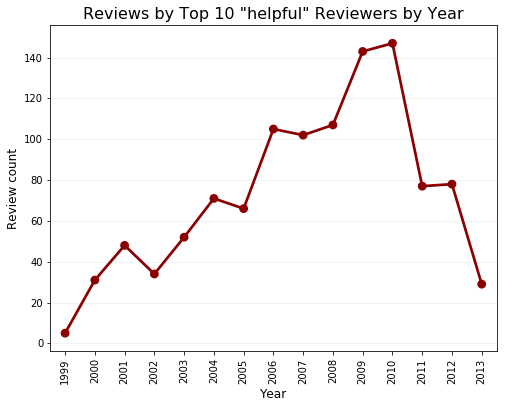

In [294]:
# Make list of top reviewers who have contributed at least 5 reviews
top_reviewers = list(reviewer_df[reviewer_df['review_count'] > 5].sort_values('helpful_ratings', ascending=False)[:10].index)
top_reviewer_filter = reviews_df['reviewerID'].isin(top_reviewers)
# Aggregate these reviewers by date and count their total reviews per year.
top_reviewers_by_date = reviews_df[top_reviewer_filter]['reviewerID'].groupby(reviews_df['reviewTime'].dt.year).count()
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a pointplot of the review count per year for the top 10 reviewers. 
# Limit to years prior to 2014 due to incomplete data
sns.pointplot(x=top_reviewers_by_date.index[0:15], y=top_reviewers_by_date.values[0:15], color='darkred')
# Set grid lines
plt.grid(color='grey', linewidth=1, fillstyle='full', alpha=0.1)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Rotate xticks to vertical
plt.xticks(rotation=90)
# Add plot title, axis labels, show plot
plt.title('Reviews by Top 10 "helpful" Reviewers by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Review count', fontsize=12)
plt.show()

After 2010, the number of reviews written by reviewers in the top 10 most helpful above dropped off dramatically. This holds true from the top 100 as well, as can be seen below.

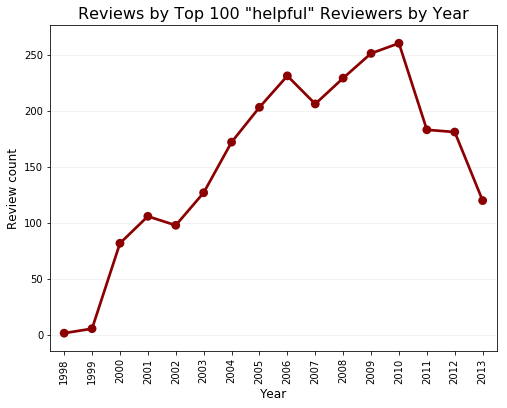

In [295]:
# Make list of top reviewers who have contributed at least 5 reviews
top_reviewers = list(reviewer_df[reviewer_df['review_count'] > 5].sort_values('helpful_ratings', ascending=False)[:100].index)
top_reviewer_filter = reviews_df['reviewerID'].isin(top_reviewers)
# Aggregate these reviewers by date and count their total reviews per year.
top_reviewers_by_date = reviews_df[top_reviewer_filter]['reviewerID'].groupby(reviews_df['reviewTime'].dt.year).count()
# Adjust figure size
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Create a pointplot of the review count per year for the top 10 reviewers. 
# Limit to years prior to 2014 due to incomplete data
sns.pointplot(x=top_reviewers_by_date.index[0:16], y=top_reviewers_by_date.values[0:16], color='darkred')
# Set grid lines
plt.grid(color='grey', linewidth=1, fillstyle='full', alpha=0.1)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Rotate xticks to vertical
plt.xticks(rotation=90)
# Add plot title, axis labels, show plot
plt.title('Reviews by Top 100 "helpful" Reviewers by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Review count', fontsize=12)
plt.show()

Now let's zoom in further and look at just the top 5 most helpful reviewers over time. The trend above seems to have strongly affected the top 10 reviewers and top 100 reviewers in aggregate, but how did it affect reviewers on an individual level?

In [268]:
top_reviewers = list(reviewer_df[reviewer_df['review_count'] > 5].sort_values('helpful_ratings', ascending=False)[:5].reviewer_name)
top_reviewer_df = pd.DataFrame(columns=reviewer_df[reviewer_df['review_count'] > 5].sort_values('helpful_ratings', ascending=False)[:5].reviewer_name)

In [270]:
for reviewer in top_reviewers:
    top_reviewer_rows = reviews_df[reviews_df['reviewerName'] == reviewer]
    top_reviewer_df[reviewer] = top_reviewer_rows['reviewerName'].groupby(reviews_df['reviewTime'].dt.year).count()
top_reviewer_df = top_reviewer_df.fillna(0)

In [271]:
top_reviewer_df = top_reviewer_df.stack().reset_index()
top_reviewer_df.columns=['reviewTime', 'reviewerName', 'reviewCount']

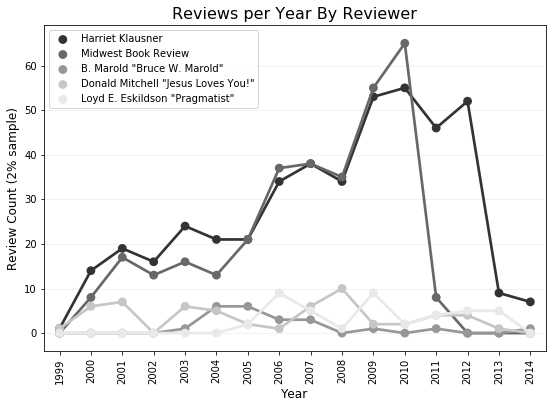

In [298]:
plt.figure(figsize=(9,6))
sns.pointplot(x='reviewTime', y='reviewCount', hue='reviewerName', data=top_reviewer_df,
             marker='', palette='Greys_r', linewidth=1, alpha=0.7)
plt.grid(color='grey', linewidth=1, fillstyle='full', alpha=0.1)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
# Set grid lines
plt.title('Reviews per Year By Reviewer', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Review Count (2% sample)', fontsize=12)
# Show Legend
plt.legend()
# Rotate xticks to vertical
plt.xticks(rotation=90)
plt.show()

A sharp decline among the most prolific reviewers is very noticable. From the trends above, it is evident that the drop off review count in 2010 by top reviewers was due to Midwest Book Review having their reviews [removed from Amazon](https://anaphoraliterary.com/journals/plj/plj-excerpts/interview-with-jim-cox-editor-of-the-midwest-book-review/). Harriet Klausner and Donald Mitchell experienced a rapid drop in number of reviews in 2012, though Loyd Eskildson's number of reviews did not decline until 2014.

It is evident that, if Amazon's goal was to maximize the helpfulness of reviews on their site, their policy adopted in 2012 was a poor decision. Barring people from writing reviews who love writing enough to dedicate their lives to it seems counter-intuitive, and its negative effects can be objectively observed. Instead of the lengthier, more helpful reviews which predominated Amazon book reviews until September of 2012, consumers are now met with very short reviews which, apparently, very few of them find helpful.